# Evaluation Results of Rare Adverse Drug Reactions (ADRs) in SIDER -- Frequency Greater than 50

Import necessary modules: 

In [1]:
import numpy as np
import pandas as pd
from ADRprofilePrediction import Pairs2Mat, evaluation
from Models import loadHyperpar
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as path_effects
import json

In [2]:
import sklearn
print(sklearn.__version__)

0.24.2


## Load data

Load the feature data in to a dictionary. Drug-target, drug-enzyme, drug-chemical structure fingerprint, drug-gene interaction, drug-transporter, drug-pathway and drug-indication are included.

In [4]:
features_dict = {
    "target":Pairs2Mat(path="data/drug_target.tsv",colname1="0",colname2="1"),
    "enzyme":Pairs2Mat(path="data/drug_enzyme.tsv",colname1="0",colname2="1"),
    "Chem":pd.read_csv("data/drug_chemsfp.tsv",sep = "\t",header=0,index_col=0),
    "DGI":Pairs2Mat(path="data/interactions.tsv",colname1="drug_claim_name",colname2="gene_name"),
    "transporter":Pairs2Mat(path="data/drug_transporter.tsv",colname1="0",colname2="1"),
    "pathway":Pairs2Mat(path="data/drug_pathway.tsv",colname1="0",colname2="1"),
    "indication":Pairs2Mat(path="data/drug_indication.tsv",colname1="1_x",colname2="6")
}


Load drug-ADR data from SIDER. Only ADRs with frequency lower than 50 were used.

In [5]:
SEs = {}
SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
column_sums = np.sum(SIDER, axis=0)
SEs["SIDER"] = SIDER.loc[:, (column_sums >= 50)]

## Set variables

The variables below includes all the options for the code.

- features_names: This varible is the list of all the features including the target feature, the enzyme feature, chemical structure fingerprint (Chem), drug-gene interaction (DGI), the transporter featrue, the pathway feature, the indication feature.
- SE_names: ADR data from SIDER.
- methods: This option is machine learning methods used for prediction. Only the top three methods were compared, SKR, VKR and KRR.
- metrice_names: Metric we used to evaluate the performance of methods: AUPR, AUROC, AUPR per drug, AUROC per drug, AUPR+AUROC and AUPR+AUROC per drug.
- SE_name: Used ADR data in this file.
- metric: We used AUPR as the tuning metrice in Nested CV and CV.

In [7]:
features_names = ["target", "enzyme", "Chem", "DGI", "transporter", "pathway", "indication"]
methods = ["SKR", "KR", "KRR"]
metrice_names = ["AUPR+AUROC", "AUPR+AUROCperdrug", "AUROC", "AUPR", "AUROCperdrug", "AUPRperdrug"]
# tuning_metrices=["AUROC", "AUPR", "AUROCperdrug", "AUPRperdrug"]
SEs_name = "SIDER"
metrice = "AUPR"

Set the variables for hyperparameters. We summarized 3 types of hyperparameters: 
 - A: This hyperparameters are tuned according to the step $\dots, 10^{-1}, 10^{0}, 10^{1}, \dots$.
 - B: This hyperparameters are in $[0,1]$ and tuned according to the step $0, 0.1, \dots, 1$.
 - C: This hyperparameters are tuned based on $5, 10, 15, \dots$.

In [8]:
A = 10**np.arange(-2, 3, 1, dtype=float)
B = np.arange(0, 1, 0.1, dtype=float)
C = np.arange(5, 20, 5, dtype=int)
all_hyperparlist = {
    "SKR":[A,B,A,A], 
    "KRR":[A,A],
    "VKR":[A,A,C]
}

Set dictionaries to store the results of CV and Nested CV.

In [10]:
results = {}
results["nested_cv"] = {}
results["cv"] = {}

## Nested CV

Load the tuned hyperparameters for reproducing results.

In [ ]:
# Open and read the JSON file
with open(f'results/hyperpars_{SEs_name}.xml', 'r') as xml_file:
    hyperpars = json.load(xml_file)

Run Nest CV using SKR, KRR and VKR.

In [14]:
method = "SKR"
validation = "nested_cv"
results[validation][method] = {}
for str in features_names:
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[validation][method][str], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation,n_jobs=1)

using feature target
The SKR requires hyperparameter lambda, c, sigma_X, sigma_Y
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  1250
first few training idx:  [ 57  75 258 281 294 362 474 479 680 698]
first few testing idx:  [ 70 151 209 236 411 438 439 625 657 704]
--- tuning end ---
target size: 142
------ best hyper pars:  (0.01, 0.4, 10, 100) ------
SKR starts:
SKR ends:
-----------
AUPRperdrug: 0.5232219812571248
AUROCperdrug: 0.831447307739449
AUPR+AUROCperdrug: 1.3546692889965737
AUPR: 0.48295019000535094
AUROC: 0.7857161267715734
AUPR+AUROC: 1.2686663167769243
-----------
Fold: 1
number of hyperpars combination:  1250
first few training idx:  [ 70 151 209 236 411 438 439 625 657 704]
first few testing idx:  [ 57  75 258 281 294 362 474 479 680 698]
--- tuning end ---
target size: 142
------ best hyper pars:  (0.01, 0.4, 10, 100) ------
SKR starts:
SKR ends:
-----------
AUPRperdrug: 0.5267357945055928
AUROCperdrug: 0.829816965288465
AUPR+AUROCperd

In [15]:
method = "KRR"
validation = "nested_cv"
results[validation][method] = {}
for str in features_names:
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[validation][method][str], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation, n_jobs=1)

using feature target
The KRR requires hyperparameter lambda, sigma_X
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  25
first few training idx:  [ 57  75 258 281 294 362 474 479 680 698]
first few testing idx:  [ 70 151 209 236 411 438 439 625 657 704]
--- tuning end ---
target size: 142
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.5206202901366479
AUROCperdrug: 0.830140559416642
AUPR+AUROCperdrug: 1.35076084955329
AUPR: 0.4728769842777816
AUROC: 0.7815706493792364
AUPR+AUROC: 1.2544476336570178
-----------
Fold: 1
number of hyperpars combination:  25
first few training idx:  [ 70 151 209 236 411 438 439 625 657 704]
first few testing idx:  [ 57  75 258 281 294 362 474 479 680 698]
--- tuning end ---
target size: 142
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.5227792406064625
AUROCperdrug: 0.8283773767756
AUPR+AUROCperdrug: 1.3511566173820624
AUPR: 0.46973542920

In [16]:
method = "VKR"
validation = "nested_cv"
results[validation][method] = {}
for str in features_names:
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[validation][method][str], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation,n_jobs=1)

using feature target
The VKR requires hyperparameter lambda, sigma_X, k
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  75
first few training idx:  [ 57  75 258 281 294 362 474 479 680 698]
first few testing idx:  [ 70 151 209 236 411 438 439 625 657 704]
--- tuning end ---
target size: 142
------ best hyper pars:  (10, 0.1, 15) ------
VKR starts:
VKR ends:
-----------
AUPRperdrug: 0.5050556687789128
AUROCperdrug: 0.8201638014547712
AUPR+AUROCperdrug: 1.3252194702336841
AUPR: 0.4641200526791473
AUROC: 0.7761796932825892
AUPR+AUROC: 1.2402997459617364
-----------
Fold: 1
number of hyperpars combination:  75
first few training idx:  [ 70 151 209 236 411 438 439 625 657 704]
first few testing idx:  [ 57  75 258 281 294 362 474 479 680 698]
--- tuning end ---
target size: 142
------ best hyper pars:  (10, 0.01, 15) ------
VKR starts:
VKR ends:
-----------
AUPRperdrug: 0.5141684181767074
AUROCperdrug: 0.8221127488483211
AUPR+AUROCperdrug: 1.3362811670250285
A

/home/yezhao/anaconda3/envs/tf-2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


VKR ends:
-----------
AUPRperdrug: 0.5103778083766176
AUROCperdrug: 0.8171472283976415
AUPR+AUROCperdrug: 1.3275250367742593
AUPR: 0.4662176626394736
AUROC: 0.7846219390358806
AUPR+AUROC: 1.2508396016753542
-----------
Fold: 1
number of hyperpars combination:  75
first few training idx:  [  9 173 236 261 271 317 365 597 633 641]
first few testing idx:  [ 39  40  41  59  91  95 195 388 570 594]
--- tuning end ---
target size: 129
------ best hyper pars:  (10, 1, 15) ------
VKR starts:
VKR ends:
-----------
AUPRperdrug: 0.5480196944452025
AUROCperdrug: 0.8220106412080996
AUPR+AUROCperdrug: 1.3700303356533021
AUPR: 0.5019001642979558
AUROC: 0.7824011868224887
AUPR+AUROC: 1.2843013511204444
-----------
Fold: 2
number of hyperpars combination:  75
first few training idx:  [  9 173 236 261 271 317 365 597 633 641]
first few testing idx:  [ 34 100 154 214 316 362 431 433 461 600]
--- tuning end ---
target size: 129
------ best hyper pars:  (10, 1, 15) ------
VKR starts:
VKR ends:
-----------


/home/yezhao/anaconda3/envs/tf-2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


VKR ends:
-----------
AUPRperdrug: 0.598365613255439
AUROCperdrug: 0.8160719236342509
AUPR+AUROCperdrug: 1.41443753688969
AUPR: 0.5501093622942516
AUROC: 0.7795782081093074
AUPR+AUROC: 1.329687570403559
-----------
Fold: 2
number of hyperpars combination:  75
first few training idx:  [ 33  76  95 104 152 185 276 283 313 349]
first few testing idx:  [  9  75  80  98 112 122 180 237 277 323]
--- tuning end ---
target size: 74
------ best hyper pars:  (10, 1, 15) ------
VKR starts:
VKR ends:
-----------
AUPRperdrug: 0.533424797682196
AUROCperdrug: 0.8080129741101059
AUPR+AUROCperdrug: 1.3414377717923018
AUPR: 0.4924457121244947
AUROC: 0.7762905441452502
AUPR+AUROC: 1.268736256269745
-----------
Fold: 3
number of hyperpars combination:  75
first few training idx:  [ 33  76  95 104 152 185 276 283 313 349]
first few testing idx:  [172 192 212 220 249 258 263 310 320 350]
--- tuning end ---
target size: 74
------ best hyper pars:  (10, 0.1, 15) ------
VKR starts:
VKR ends:
-----------
AUPRpe

## Show the Boxplots for Comparing the Performance of Methods in Rare ADRs

Reorganize the results.

In [17]:
df = pd.DataFrame()
for m, fs in results["nested_cv"].items():
    for f, mes in fs.items():
        for me, scores in mes.items():
            temp_df = pd.DataFrame({
                'method': m,
                'feature': f,
                'metric': me,
                "score": scores
            })
            df = pd.concat([df, temp_df], ignore_index=True)

print(df)

    method     feature       metric     score
0      SKR      target  AUPRperdrug  0.523222
1      SKR      target  AUPRperdrug  0.526736
2      SKR      target  AUPRperdrug  0.510664
3      SKR      target  AUPRperdrug  0.558457
4      SKR      target  AUPRperdrug  0.513761
..     ...         ...          ...       ...
625    VKR  indication   AUPR+AUROC  1.354230
626    VKR  indication   AUPR+AUROC  1.369401
627    VKR  indication   AUPR+AUROC  1.356675
628    VKR  indication   AUPR+AUROC  1.366930
629    VKR  indication   AUPR+AUROC  1.364843

[630 rows x 4 columns]


In [18]:
# Convert the 'Label' column to a categorical type with the 
custom_order = ["pathway","Chem", "DGI",  "indication", "target", "transporter", "enzyme"]
df['feature'] = pd.Categorical(df['feature'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'Label' column
df_sorted = df.sort_values('feature')

Draw the boxplot according to the reorganized results.

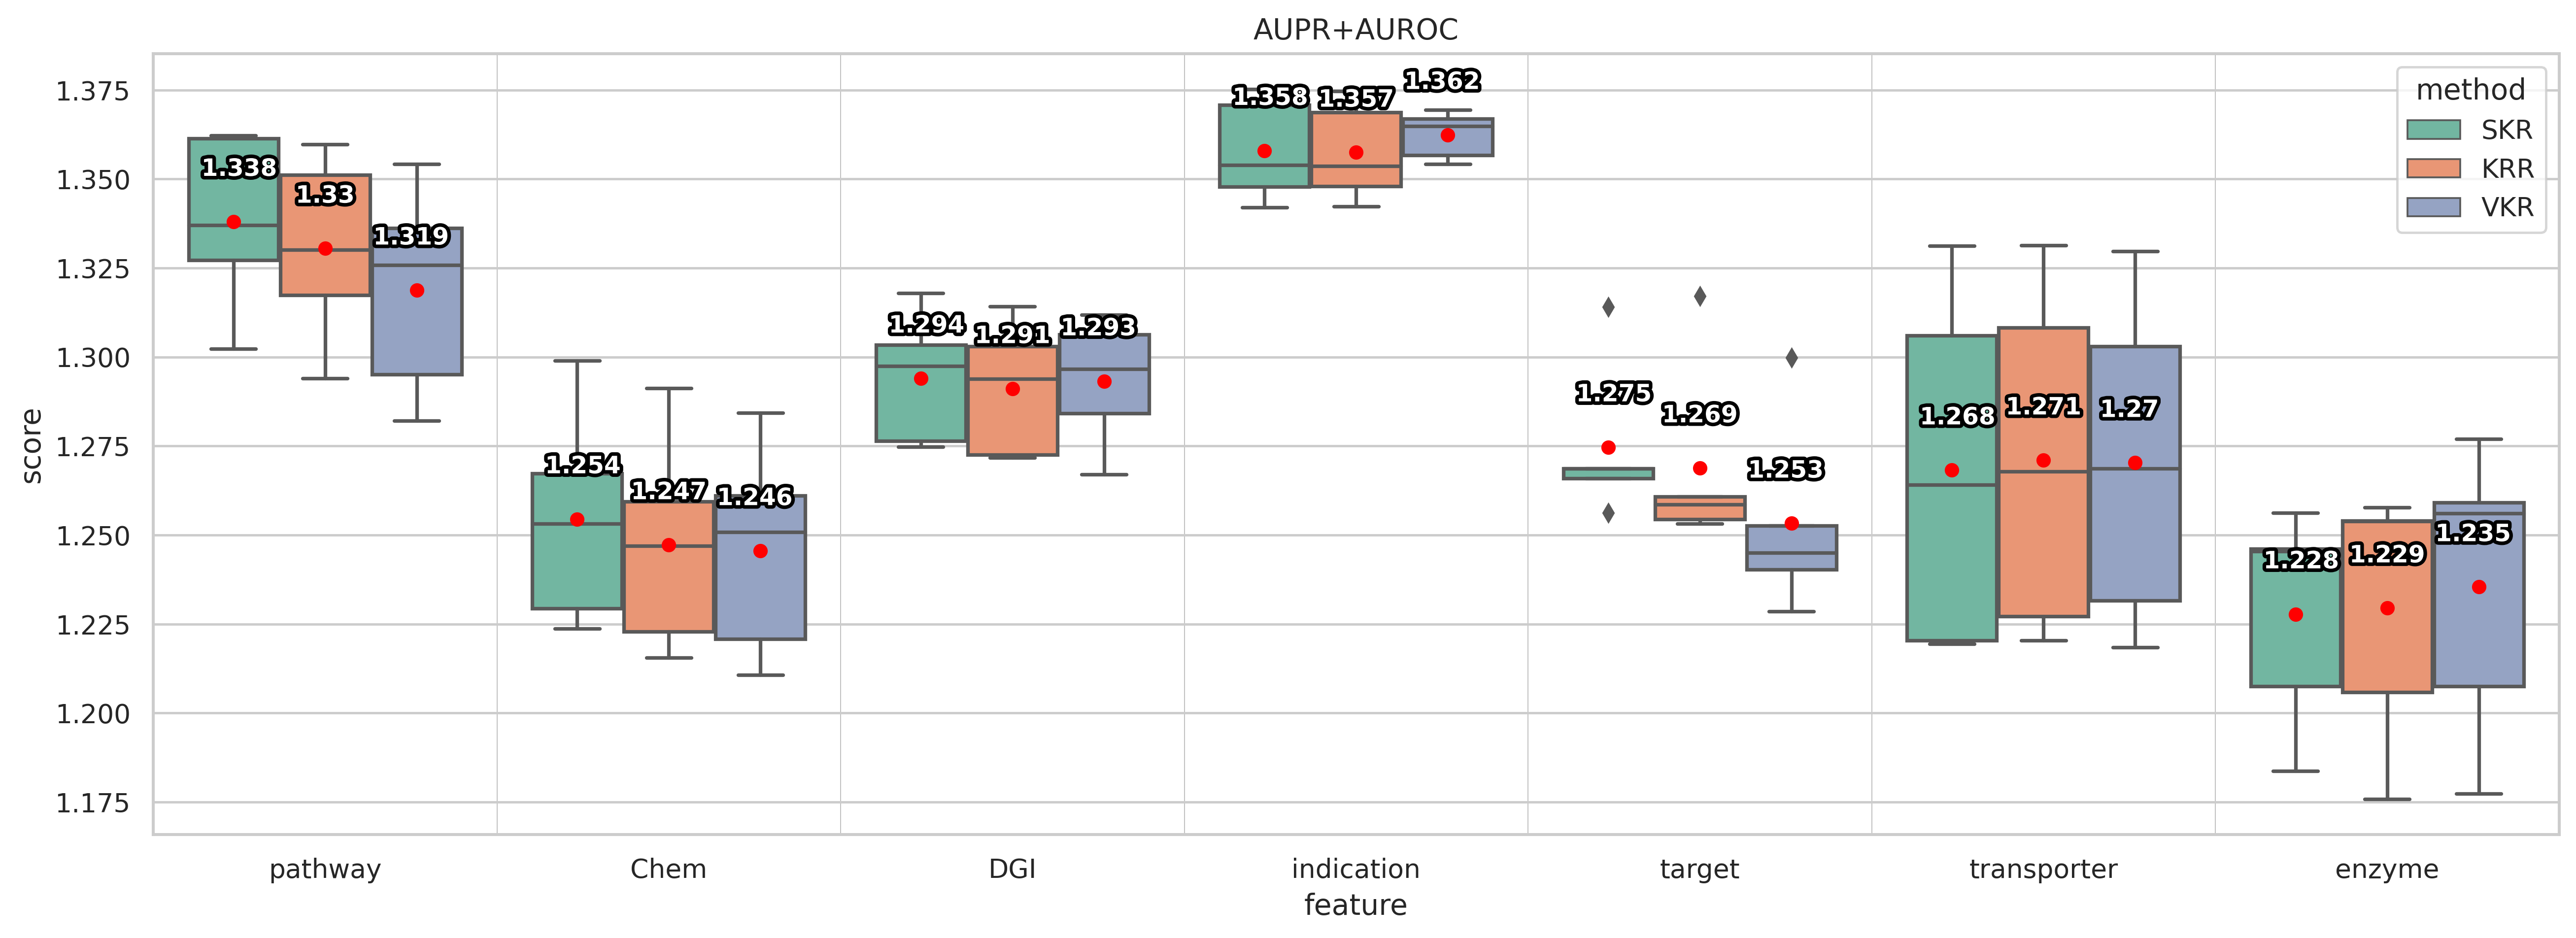

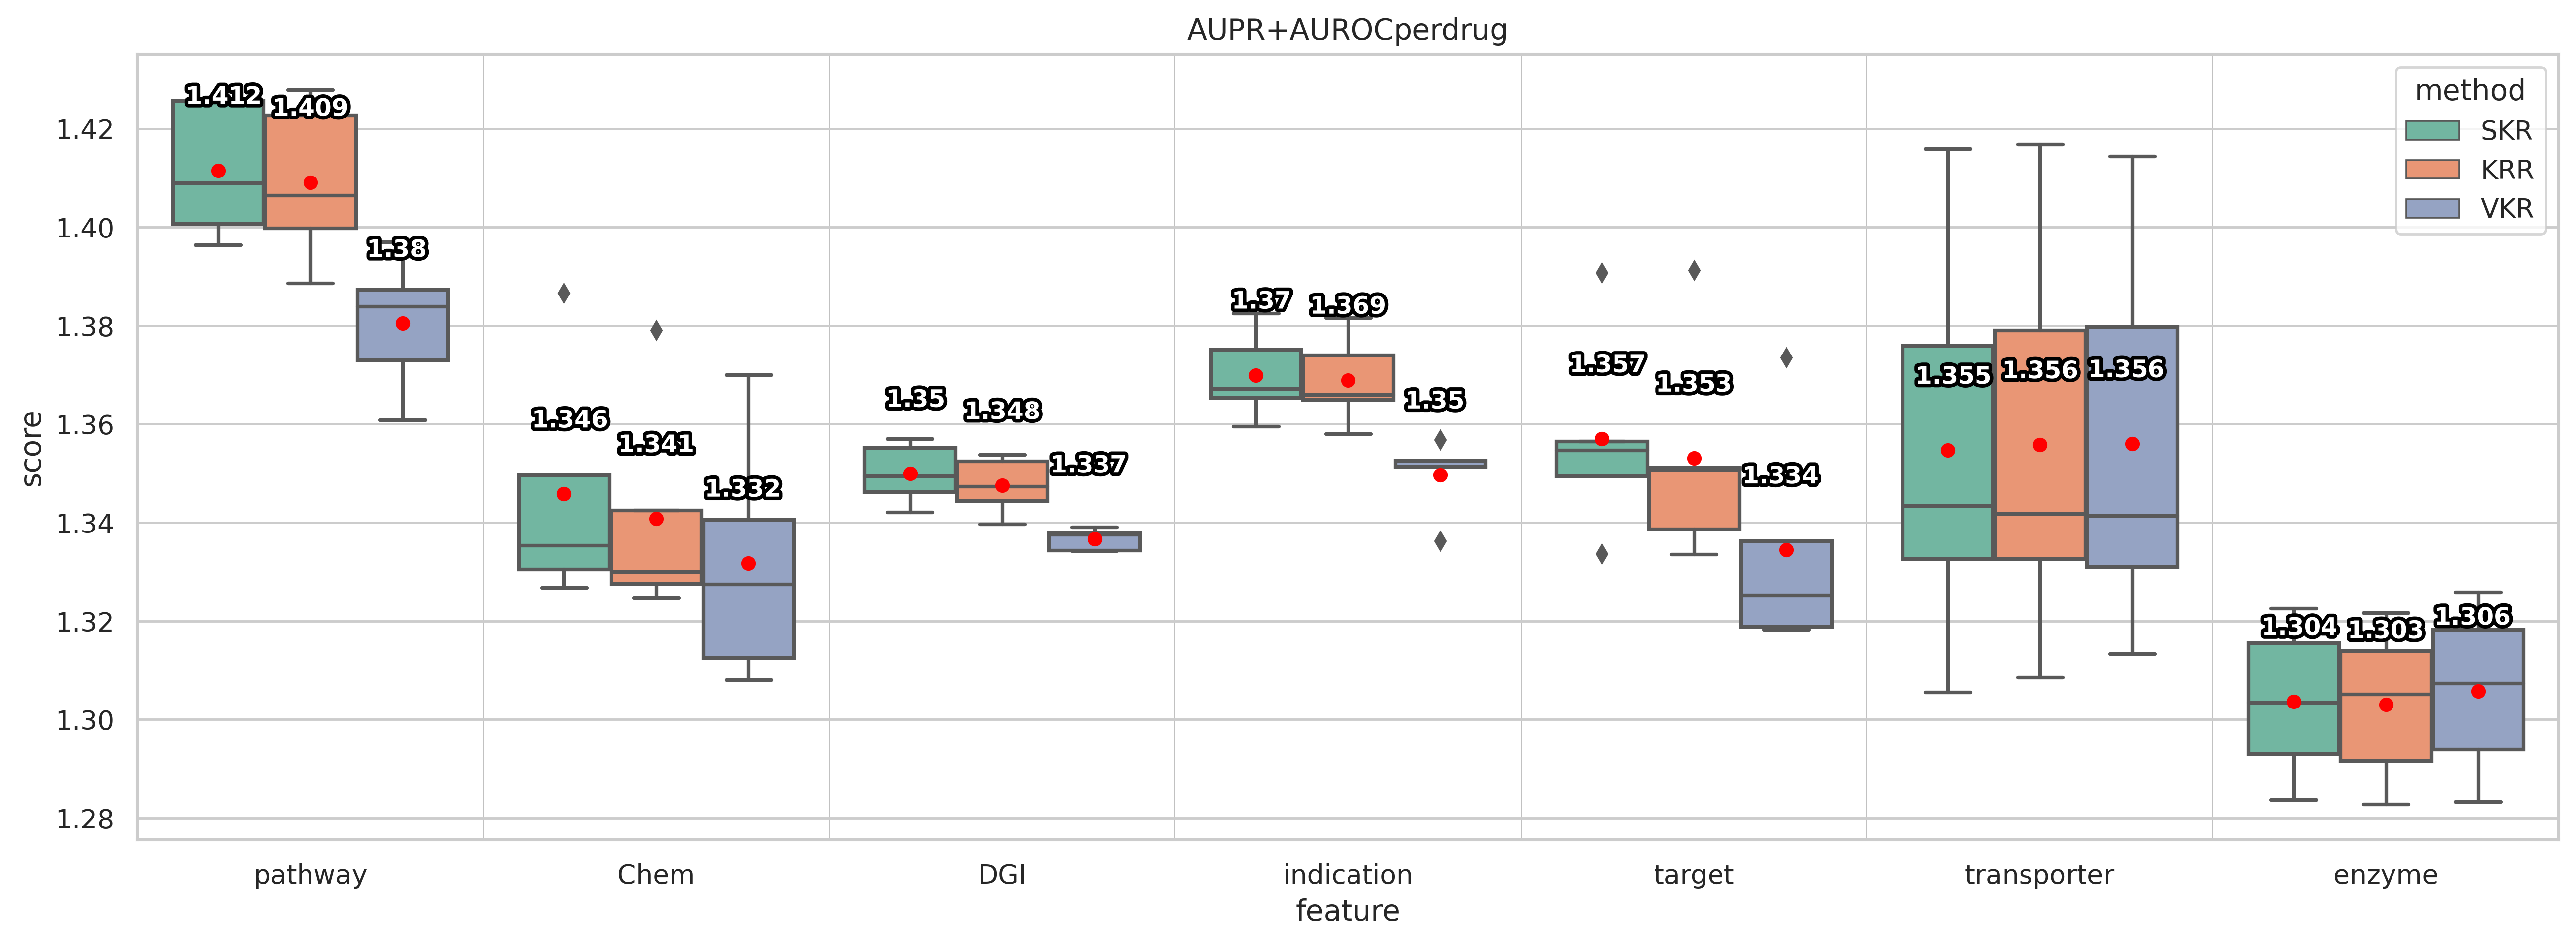

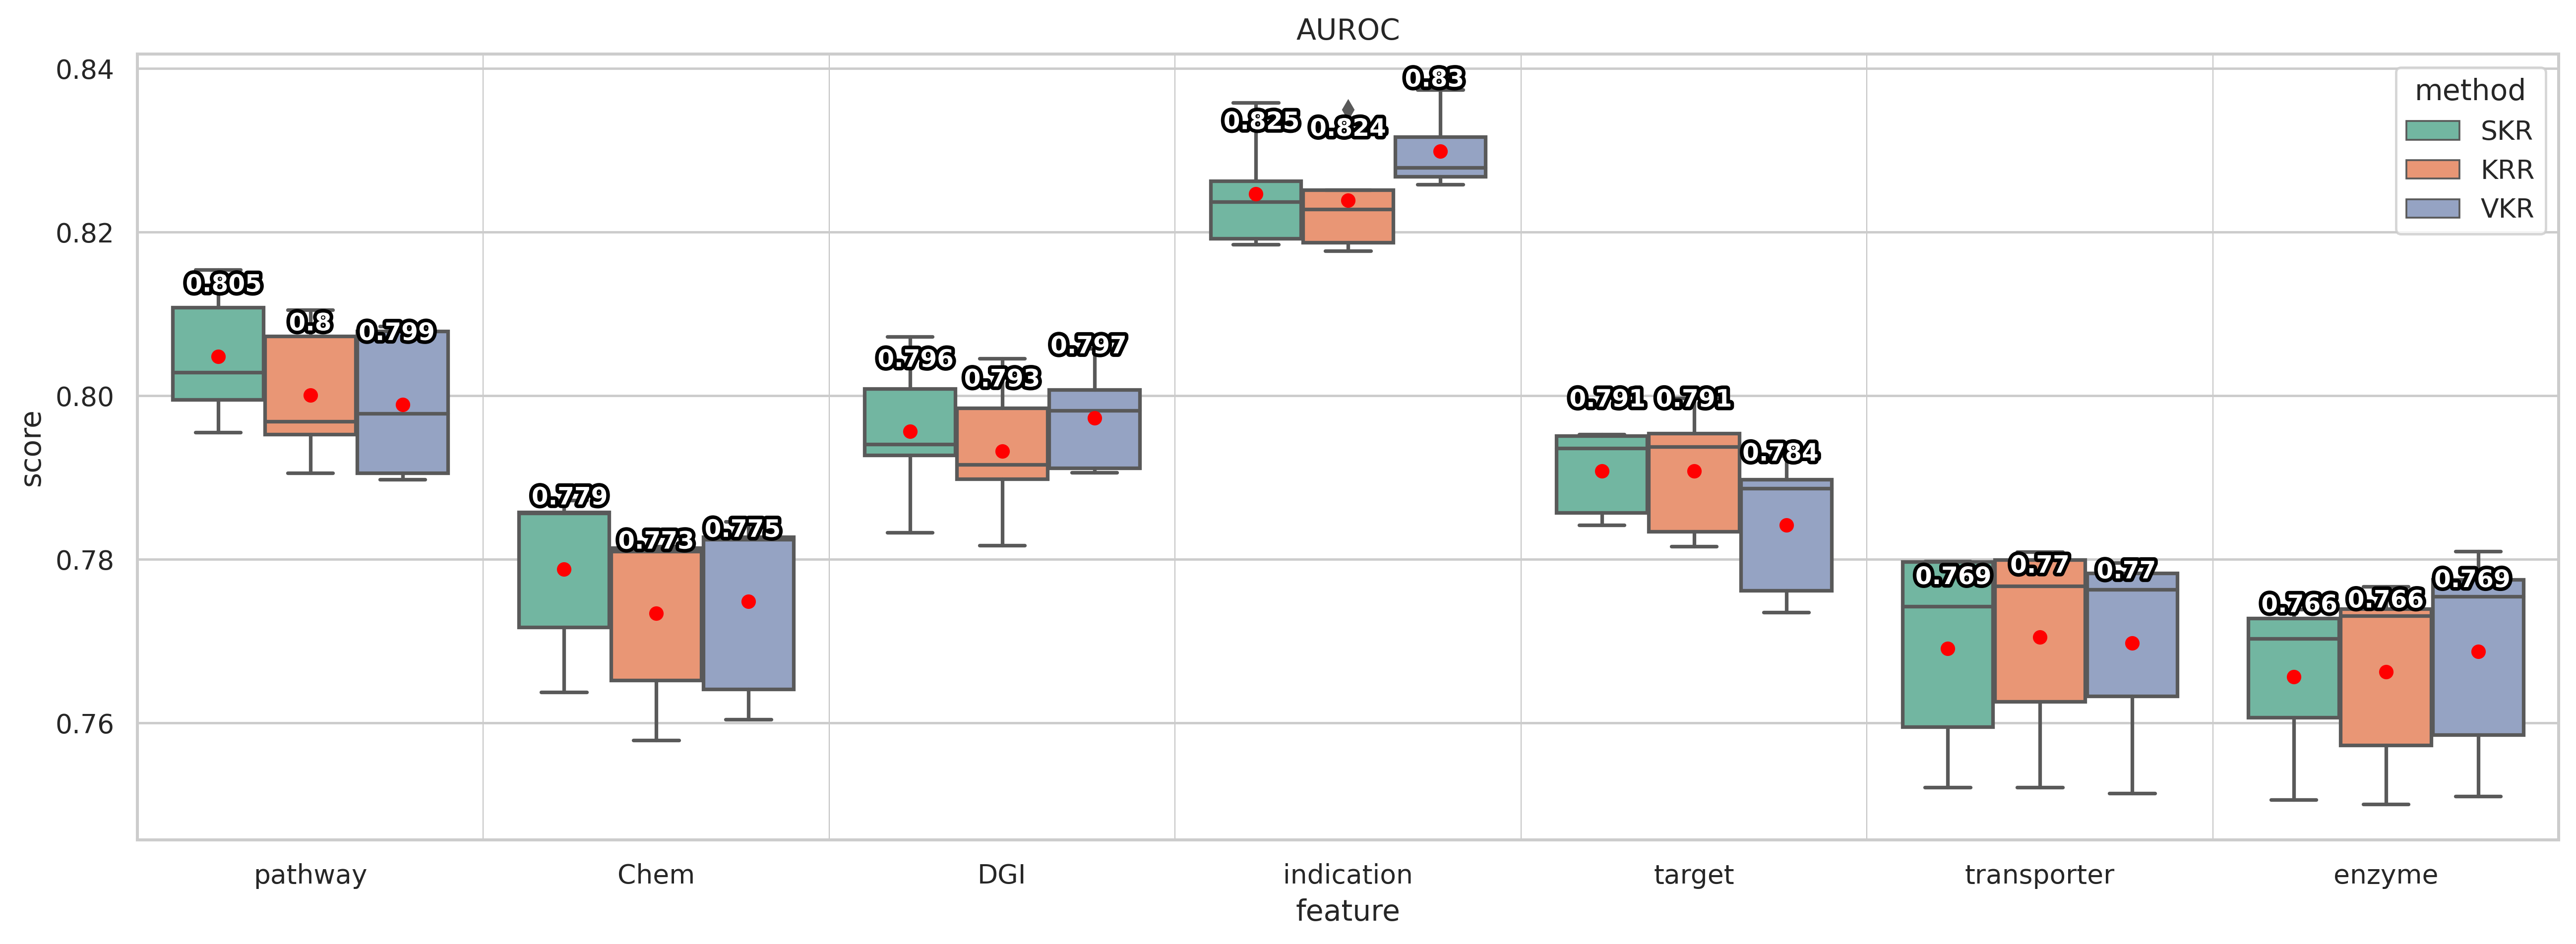

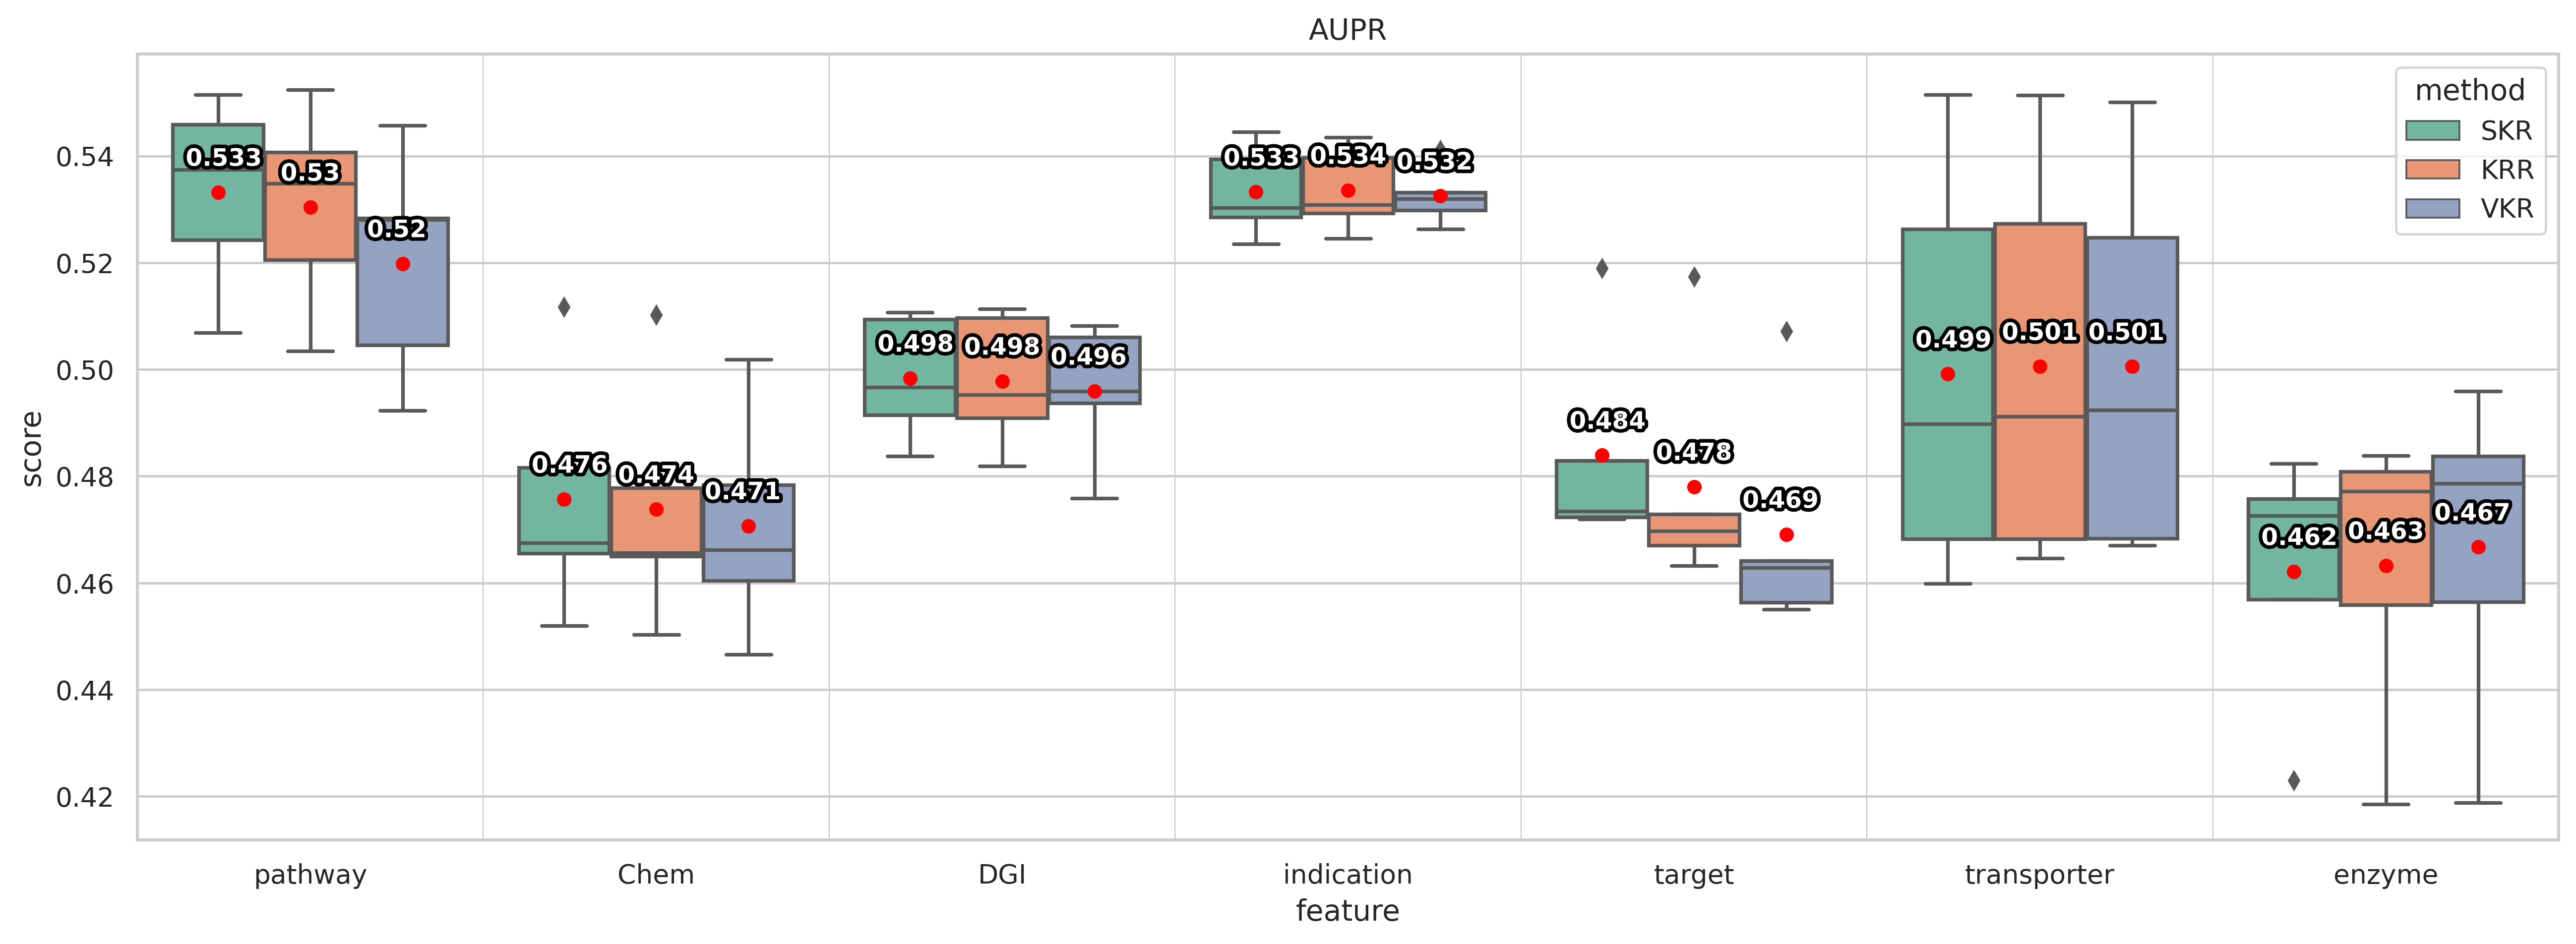

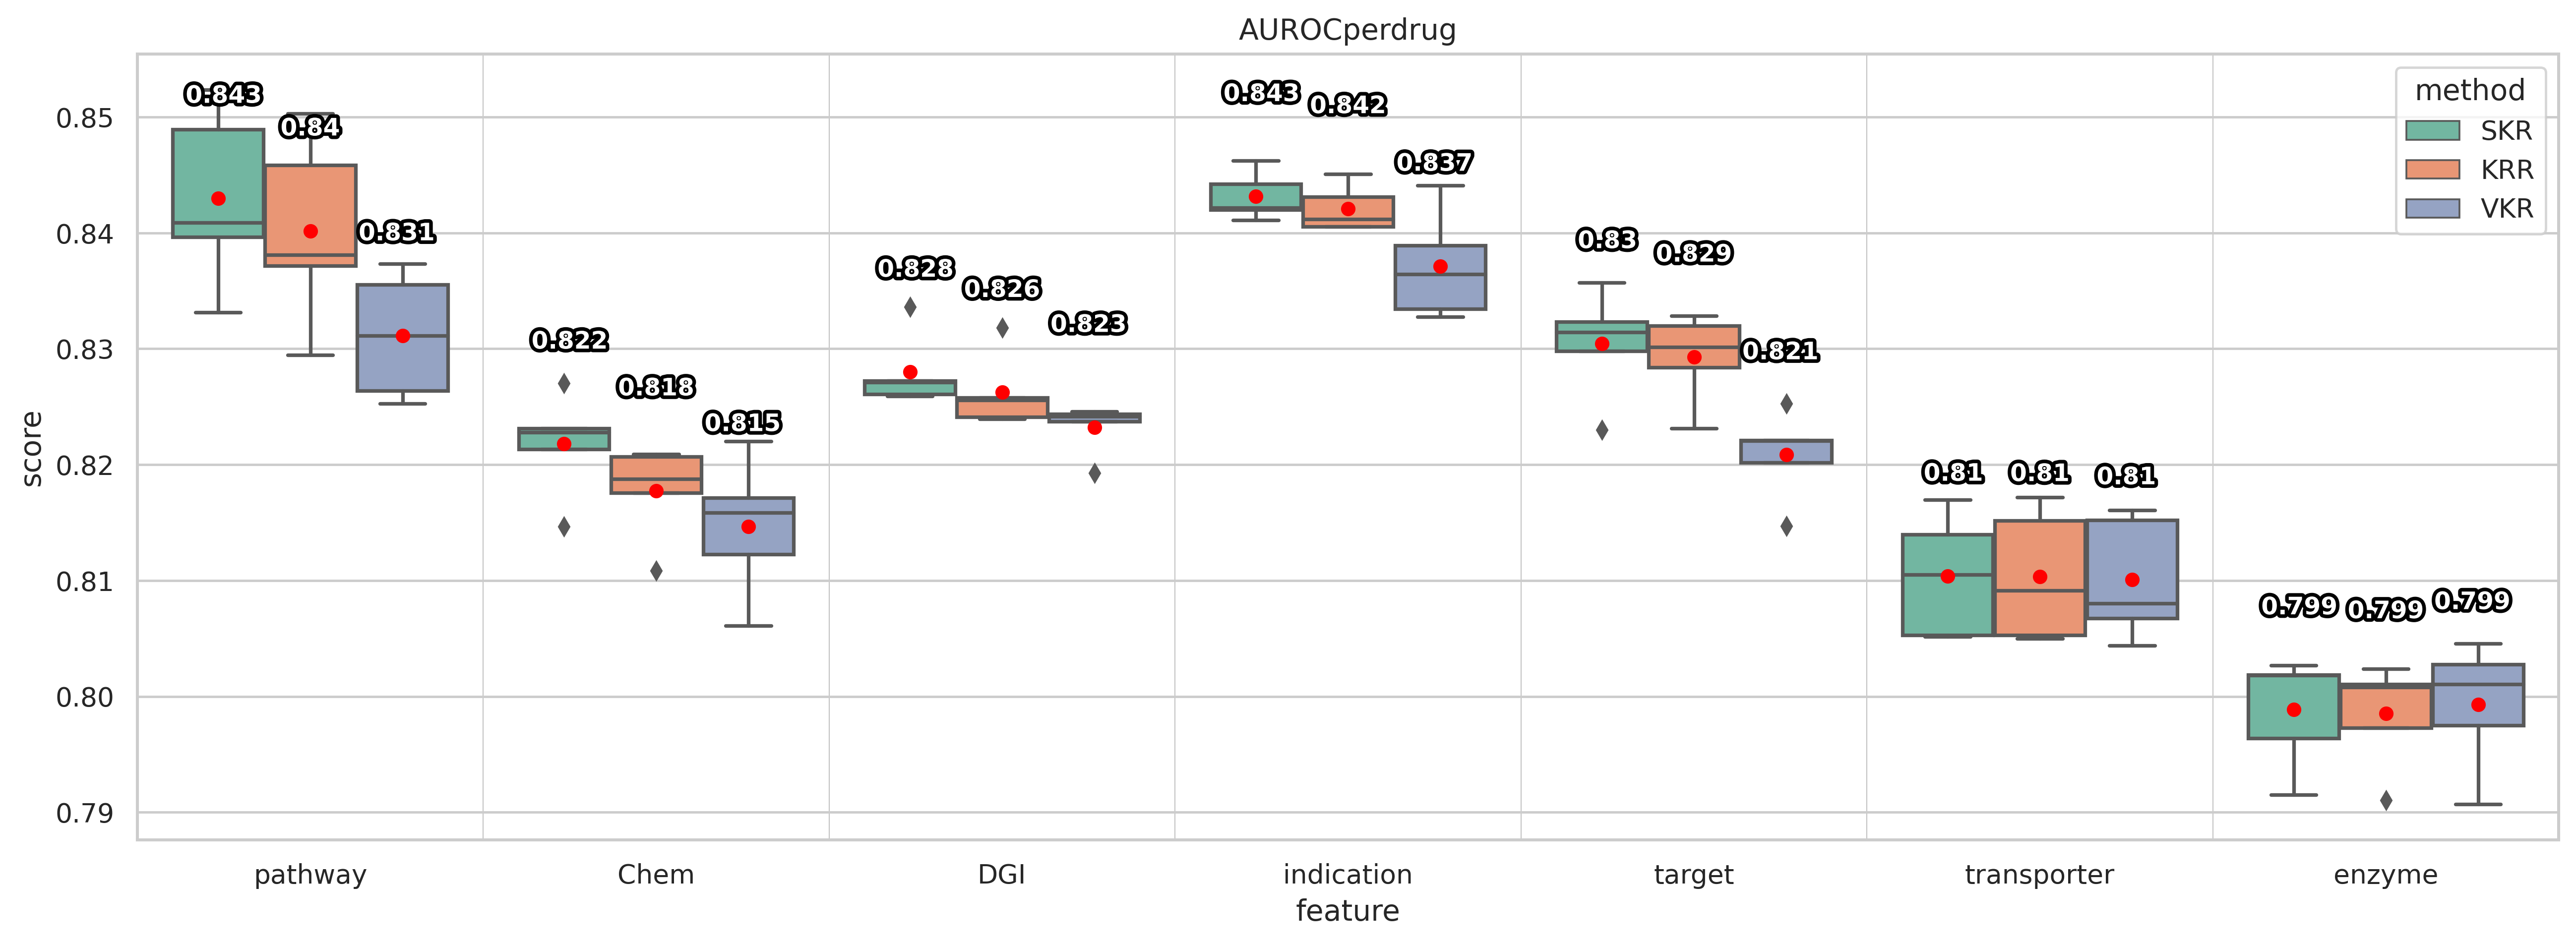

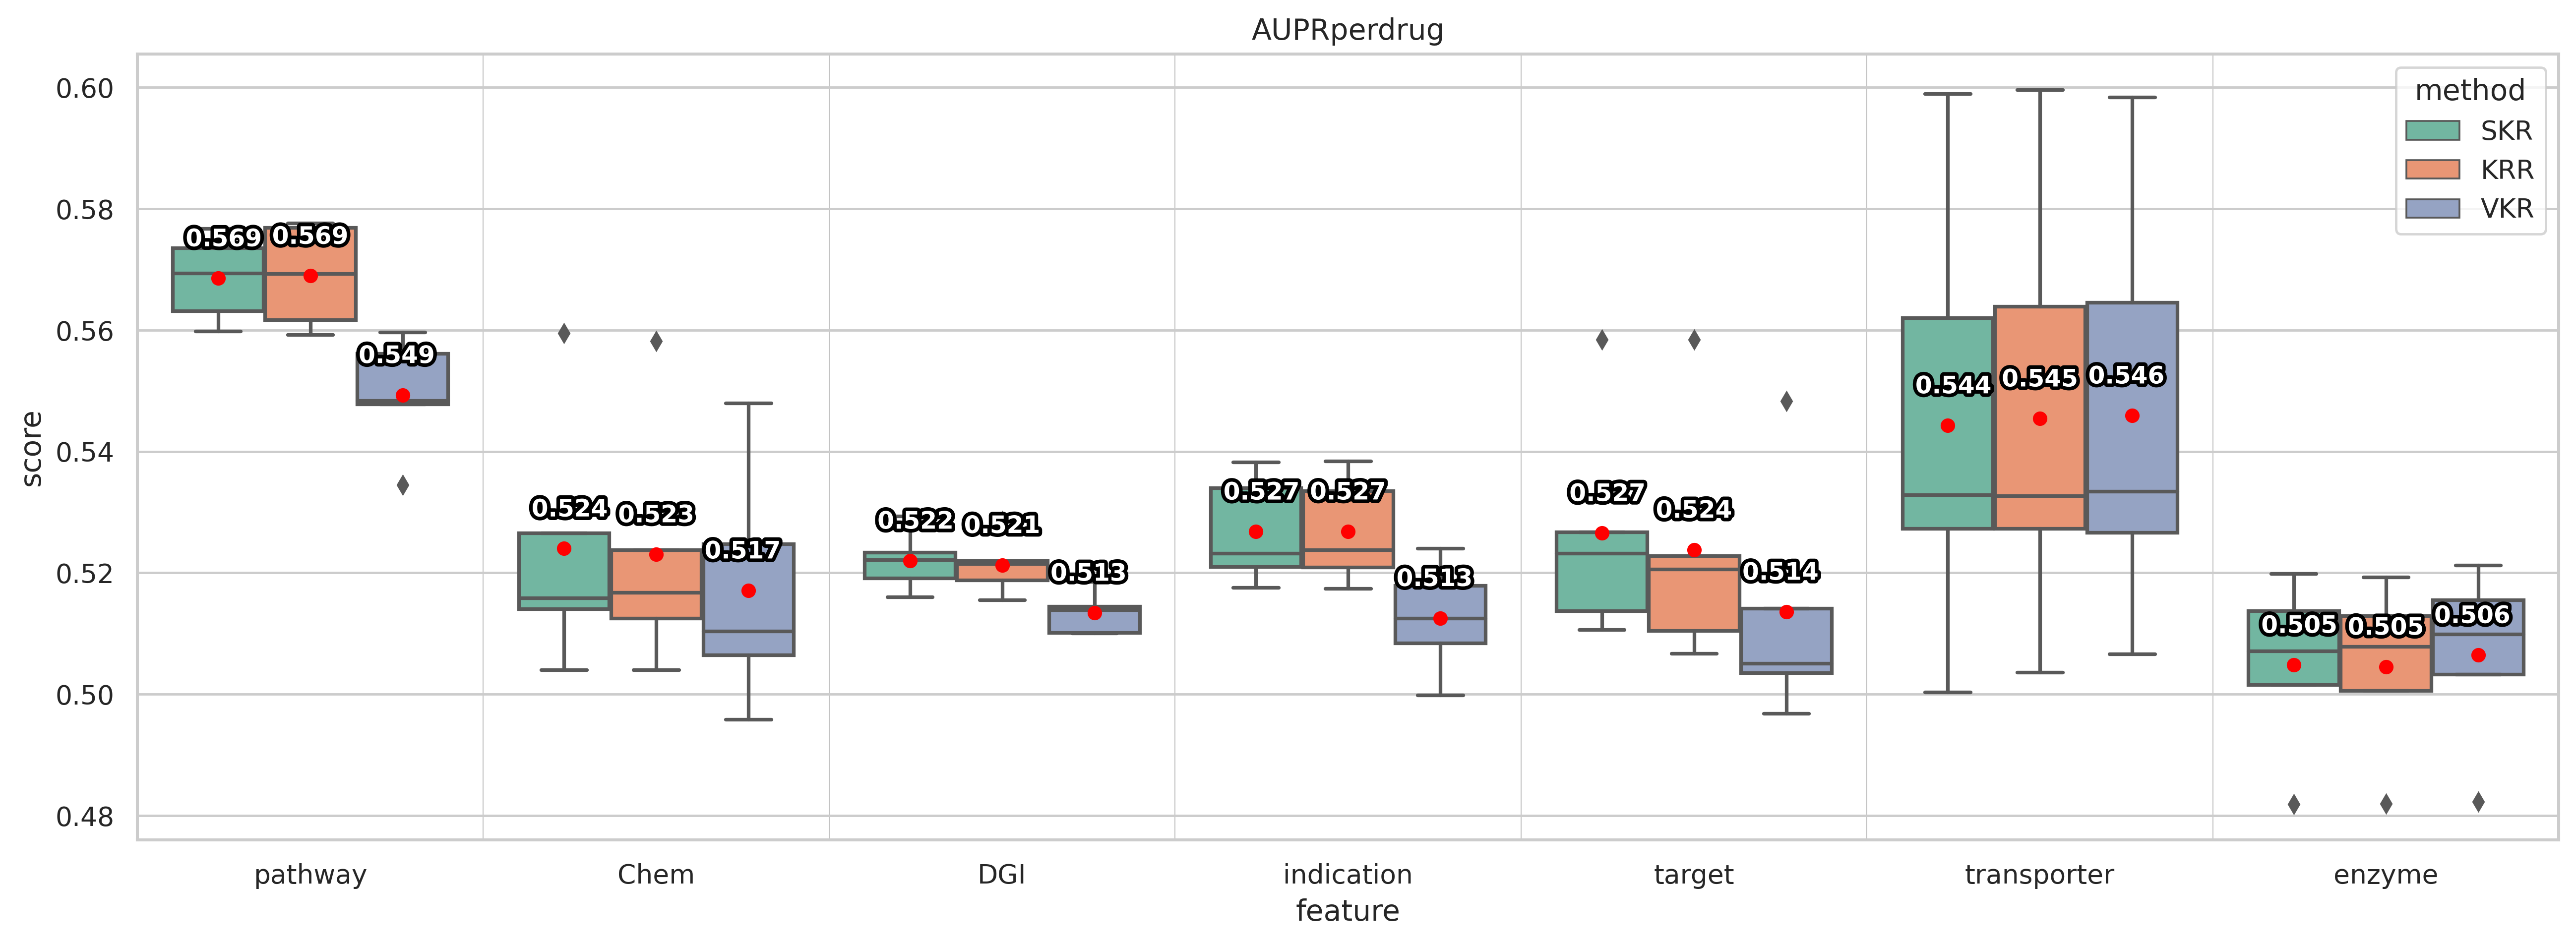

In [22]:
for metrice in metrice_names:
    # sns.set_style('white')
    plt.figure(figsize=(18, 6), dpi=350)

    sns.set_theme(rc={'figure.figsize':(18, 6)},style='whitegrid')
    # sns.axes_style("whitegrid")
    dfplot = df_sorted[df_sorted["metric"]==metrice]
    means = {}
    vertical_offset = dfplot['score'].mean() * 0.01
    ax = sns.boxplot(x = dfplot['feature'], 
                y = dfplot['score'], 
                hue = dfplot['method'], 
                palette = 'Set2',
                showmeans=True,
                meanprops={'marker':'o',
                           'markerfacecolor':'red', 
                           'markeredgecolor':'red',
                           'markersize':'5'}
                           )
    for method in methods:
        means[method] = dfplot[dfplot["method"]==method].groupby(['feature'])["score"].mean()
        i = -0.5

    for method in methods:
        i += 0.25
        for xtick in ax.get_xticks():
            text = ax.text(xtick + i, means[method][xtick] + vertical_offset, round(means[method][xtick], 3), 
                           horizontalalignment='center',size='small',color='white',weight='semibold')
            text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.grid(True, which='minor', color='black', lw=0.1)
    plt.title(metrice)
    plt.savefig(fname=f"figs/{metrice}_50_all.jpg", bbox_inches="tight")
    plt.show()